In [18]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
metadata_df = pd.read_csv('data/uk_pv/metadata.csv')


In [16]:
pv_power = xr.open_dataset("../uk_pv/pv.netcdf", engine="h5netcdf")

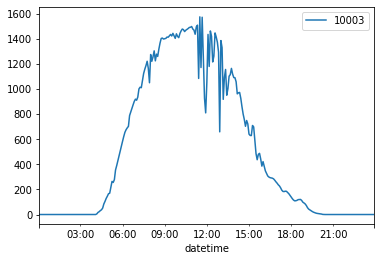

In [19]:
on_pv_system = pv_power['10003'].to_dataframe()
on_pv_system = on_pv_system[on_pv_system.index < '2021-06-02']
on_pv_system = on_pv_system[on_pv_system.index > '2021-06-01']

on_pv_system.plot()
# plt.savefig('PV_yield_one_site.jpg')

In [5]:
metadata_df.head()

,ss_id,latitude_rounded,longitude_rounded,llsoacd,orientation,tilt,kwp,operational_at
0,2405,53.53,-1.63,E01007430,180.0,35.0,3.36,2010-11-18
1,2406,54.88,-1.38,E01008780,315.0,30.0,1.89,2010-12-03
2,2407,54.88,-1.38,E01008780,225.0,30.0,1.89,2010-12-03
3,2408,54.88,-1.38,E01008780,225.0,30.0,1.89,2010-12-03
4,2409,54.88,-1.38,E01008780,225.0,30.0,1.89,2010-12-03


In [6]:
on_pv_system.shape

(287, 1)

In [7]:
on_pv_system.head()

,10003
datetime,
2021-06-01 00:05:00,0.0
2021-06-01 00:10:00,0.0
2021-06-01 00:15:00,0.0
2021-06-01 00:20:00,0.0
2021-06-01 00:25:00,0.0


In [8]:
print(pv_power['10003'])

<xarray.DataArray '10003' (datetime: 387254)>
[387254 values with dtype=float32]
Coordinates:
  * datetime  (datetime) datetime64[ns] 2018-01-01T06:05:00 ... 2021-10-27T23...


In [9]:
# The data variables are the same as 'ss_id' in the metadata. 
# Each data variable contains the solar generation (in kw) for that PV system. 
# The ss_id's here are a subset of all the ss_id's in the metadata 
# The coordinates of the date are tagged as 'datetime' which is the datetime of the solar generation reading.
